# Cifar10 with CNN 

## 1) 사용가능한 GPU를 확인합니다

In [1]:
!nvidia-smi

Wed Jan 22 07:27:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## 2) 필요한 모듈을 import 합니다

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt

## 3) manual seed를 고정시킵니다

In [0]:
random.seed(1)
torch.manual_seed(1)

## 4) hyper parameter를 설정합니다

In [0]:
batch_size = 100
epochs = 50
learning_rate = 1e-3

## 5) torchvision으로부터 데이터를 불러옵니다

In [0]:
cifar10_train = dsets.CIFAR10(root='cifar10',
                              train=True,
                              transform=transforms.ToTensor(),
                              download=True)
cifar10_test = dsets.CIFAR10(root='cifar10',
                             train=False,
                             transform=transforms.ToTensor(),
                             download=True)

Files already downloaded and verified
Files already downloaded and verified


## 6) 불러온 데이터를 각각 데이터 로더에 넣어줍니다

In [0]:
train_loader = torch.utils.data.DataLoader(cifar10_train, 
                                           batch_size=100,
                                           shuffle=True, 
                                           num_workers=2)

test_loader = torch.utils.data.DataLoader(cifar10_test, 
                                          batch_size=10000,
                                          shuffle=False, 
                                          num_workers=2)

## 7) CNN structure를 구축합니다

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## 8) 모델을 생성하고 모델 정보를 출력해봅니다

In [0]:
model = CNN()
model

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## 9) 임의의 텐서를 생성하여 모델을 테스트합니다

In [0]:
value = torch.FloatTensor(100, 3, 32, 32)
model(value).shape

torch.Size([100, 10])

## 10) criterion & optimizer를 지정합니다

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## 11) model training을 시작합니다

In [0]:
model.train()
for epoch in range(1, epochs+1):
    avg_loss = 0
    total_batch = len(data_loader)

    for x_train, y_train in data_loader:
        prediction = model(x_train)

        loss = criterion(prediction, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        avg_loss += loss / total_batch

    print('[epoch: {:2d}/{}] loss: {:.6f}'.format(epoch, epochs, avg_loss))

print('Learning finished')

[epoch:  1/50] loss: 1.765743
[epoch:  2/50] loss: 1.520452
[epoch:  3/50] loss: 1.414107
[epoch:  4/50] loss: 1.338522
[epoch:  5/50] loss: 1.282692
[epoch:  6/50] loss: 1.238215
[epoch:  7/50] loss: 1.189969
[epoch:  8/50] loss: 1.153670
[epoch:  9/50] loss: 1.121452
[epoch: 10/50] loss: 1.091728
[epoch: 11/50] loss: 1.055017
[epoch: 12/50] loss: 1.025882
[epoch: 13/50] loss: 1.001712
[epoch: 14/50] loss: 0.977865
[epoch: 15/50] loss: 0.951719
[epoch: 16/50] loss: 0.930897
[epoch: 17/50] loss: 0.908178
[epoch: 18/50] loss: 0.883849
[epoch: 19/50] loss: 0.870442
[epoch: 20/50] loss: 0.857832
[epoch: 21/50] loss: 0.833644
[epoch: 22/50] loss: 0.815881
[epoch: 23/50] loss: 0.805751
[epoch: 24/50] loss: 0.787463
[epoch: 25/50] loss: 0.772788
[epoch: 26/50] loss: 0.758168
[epoch: 27/50] loss: 0.749026
[epoch: 28/50] loss: 0.733450
[epoch: 29/50] loss: 0.719779
[epoch: 30/50] loss: 0.714100
[epoch: 31/50] loss: 0.701066
[epoch: 32/50] loss: 0.682356
[epoch: 33/50] loss: 0.673106
[epoch: 34

## 12) trained model의 test를 수행합니다

accuracy:  0.6104000210762024
Label: 0, airplane
Prediction: 0, airplane


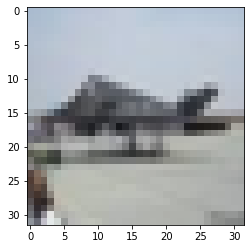

In [0]:
model.eval()
with torch.no_grad():
    for x_test, y_test in test_loader:
        prediction = model(x_test)    
        correct = torch.argmax(prediction, 1) == torch.LongTensor(y_test)
        accuracy = correct.float().mean()
        print('accuracy: ', accuracy.item())

        r = random.randint(0, len(x_test)-1)
        x_test_r = x_test[r].view(-1, 3, 32, 32)
        y_test_r = y_test[r]
        prediction_r = model(x_test_r)

        classes = cifar10_test.classes

        print('Label: {}, {}'.format(y_test_r, classes[y_test_r]))
        print('Prediction: {}, {}'.format(torch.argmax(prediction_r), classes[torch.argmax(prediction_r)]))

        x = cifar10_test.data[r]
        plt.imshow(x)
        plt.show()

# Full code

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt

random.seed(1)
torch.manual_seed(1)

batch_size = 100
epochs = 15
learning_rate = 1e-3

cifar10_train = dsets.CIFAR10(root='cifar10',
                              train=True,
                              transform=transforms.ToTensor(),
                              download=True)
cifar10_test = dsets.CIFAR10(root='cifar10',
                             train=False,
                             transform=transforms.ToTensor(),
                             download=True)

train_loader = torch.utils.data.DataLoader(dataset=cifar10_train,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset=cifar10_test,
                                          batch_size=10000,
                                          shuffle=False,
                                          drop_last=True)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = CNN()
value = torch.FloatTensor(100, 3, 32, 32)
# print(value.shape)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

model.train()
for epoch in range(1, epochs+1):
    avg_loss = 0
    total_batch = len(train_loader)

    for x_train, y_train in train_loader:
        prediction = model(x_train)

        loss = criterion(prediction, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        avg_loss += loss / total_batch

    print('[epoch: {:2d}/{}] loss: {:.6f}'.format(epoch, epochs, avg_loss))

print('learning_finished')

Files already downloaded and verified
Files already downloaded and verified
[epoch:  1/15] loss: 1.791955
[epoch:  2/15] loss: 1.495150
[epoch:  3/15] loss: 1.387906
[epoch:  4/15] loss: 1.307262
[epoch:  5/15] loss: 1.253007
[epoch:  6/15] loss: 1.218557
[epoch:  7/15] loss: 1.172794
[epoch:  8/15] loss: 1.138850
[epoch:  9/15] loss: 1.107512
[epoch: 10/15] loss: 1.087272
[epoch: 11/15] loss: 1.054132
[epoch: 12/15] loss: 1.034090
[epoch: 13/15] loss: 1.009869
[epoch: 14/15] loss: 0.985977
[epoch: 15/15] loss: 0.963989
learning_finished


accuracy:  0.623199999332428
torch.Size([1, 3, 32, 32])
Label:  3 cat
Prediction:  3 cat


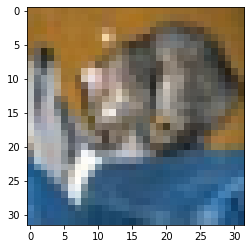

In [24]:
model.eval()
with torch.no_grad():
    for x_test, y_test in test_loader:
        prediction = model(x_test)
        correct = torch.argmax(prediction, 1) == y_test
        accuracy = correct.float().mean()
        print('accuracy: ', accuracy.item())

        r = random.randint(0, len(test_loader)-1)
        x_test_r = x_test[r].view(1, 3, 32, 32)
        print(x_test_r.shape)
        y_test_r = y_test[r]
        prediction_r = torch.argmax(model(x_test_r), 1)

        classes = cifar10_test.classes

        print('Label: ', y_test_r.item(), classes[y_test_r.item()])
        print('Prediction: ', prediction_r.item(), classes[prediction_r.item()])

        plt.imshow(cifar10_test.data[r])
        plt.show()